### Dependecies

In [1]:
!pip install --upgrade pip

In [2]:
!apt update && apt install ffmpeg libsm6 libxext6 -y

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian-security buster/updates InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease



8 packages can be upgraded. Run 'apt list --upgradable' to see them.



libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1+b2).
ffmpeg is already the newest version (7:4.1.11-0+deb10u1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [3]:
!pip install opencv-python

In [4]:
# class_names = ['carakan_ba', 'carakan_ca', 'carakan_da', 'carakan_dha', 'carakan_ga', 'carakan_ha', 'carakan_ja', 'carakan_ka', 'carakan_la', 'carakan_ma', 'carakan_na', 'carakan_nga', 'carakan_nya', 'carakan_pa', 'carakan_ra', 'carakan_sa', 'carakan_ta', 'carakan_tha', 'carakan_wa', 'carakan_ya', 'pasangan_ba', 'pasangan_ca', 'pasangan_da', 'pasangan_dha', 'pasangan_ga', 'pasangan_ha', 'pasangan_ja', 'pasangan_ka', 'pasangan_la', 'pasangan_ma', 'pasangan_na', 'pasangan_nga', 'pasangan_nya', 'pasangan_pa', 'pasangan_ra', 'pasangan_sa', 'pasangan_ta', 'pasangan_tha', 'pasangan_wa', 'pasangan_ya', 'sandhangan_e', 'sandhangan_e2', 'sandhangan_h', 'sandhangan_i', 'sandhangan_ng', 'sandhangan_o', 'sandhangan_r', 'sandhangan_u']

In [5]:
class_names = ['carakan_ba', 'carakan_ca', 'carakan_da', 'carakan_dha', 'carakan_ga', 'carakan_ha', 'carakan_ja', 'carakan_ka', 'carakan_la', 'carakan_ma', 'carakan_na', 'carakan_nga', 'carakan_nya', 'carakan_pa', 'carakan_ra', 'carakan_sa', 'carakan_ta', 'carakan_tha', 'carakan_wa', 'carakan_ya', 'sandhangan_e', 'sandhangan_e2', 'sandhangan_h', 'sandhangan_i', 'sandhangan_ng', 'sandhangan_o', 'sandhangan_r', 'sandhangan_u']

### Load Original RGB Image

In [6]:
%cd /work/testing

/work/testing


(564, 1189, 3)


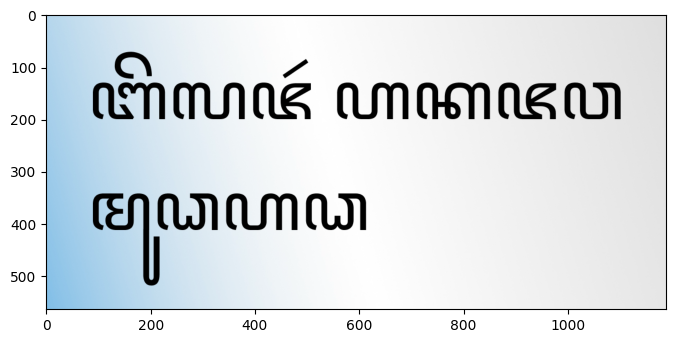

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# image = cv2.imread('sinawi_basa.png')
image = cv2.imread('segmentation_color.jpg')
print(image.shape)
plt.figure(figsize=(8, 8))
plt.imshow(image)

In [8]:
%cd ..

/work


### Convert RGB Into Grayscale

(564, 1189)


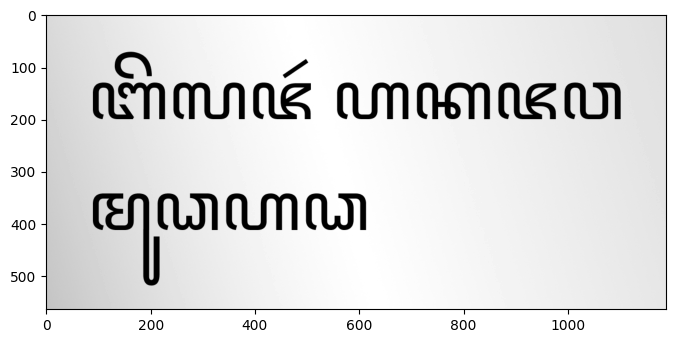

In [9]:
# Preprocessing steps
# Grayscaling
def grayscale(image):
    # image = cv2.imread('kalimat_aksara_6.png' ,)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image
    
gray_image = grayscale(image)
print(gray_image.shape)
plt.figure(figsize=(8, 8))
plt.imshow(gray_image,cmap='gray')

### Convert Grayscale Image into Binary Image

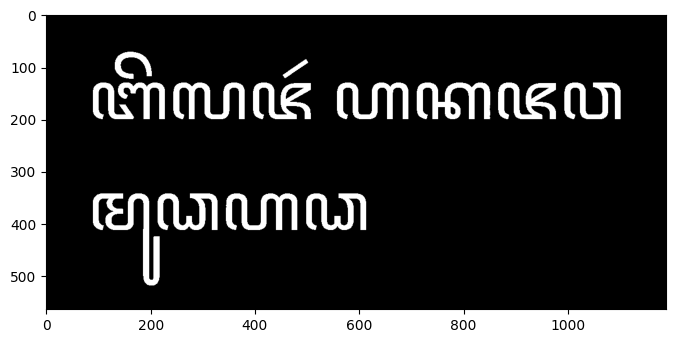

In [10]:
# Thresholding
def thresholding(image):
    _, threshold_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV)
     
    contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        print("[IMAGE DETECT]Error: No contours found.")
        return None

    return threshold_image

threshold_image = thresholding(gray_image)

plt.figure(figsize=(8, 8))
plt.imshow(threshold_image,cmap='gray')

(564, 1189)


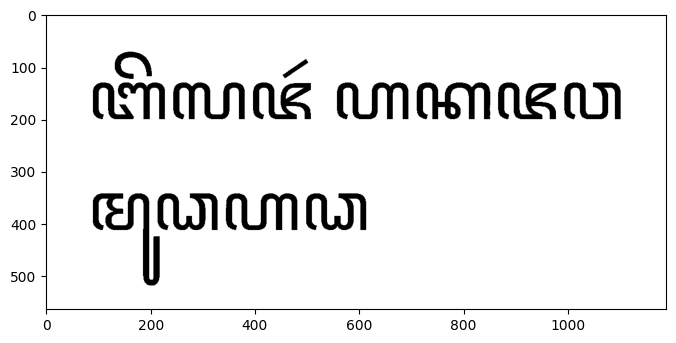

In [11]:
# Negative transformation    
negative_image = cv2.bitwise_not(threshold_image)

print(negative_image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(negative_image, cmap='gray')

### Dilate Image

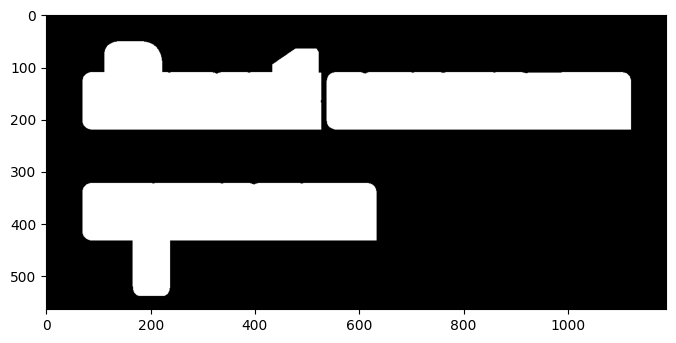

In [12]:
import cv2
import numpy as np

def dilate_image(image, kernel_size):
    # Set the kernel size and sigma
    sigma = 1.5

    # Define the kernel for dilation
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Perform dilation
    dilated_image = cv2.dilate(image, kernel, iterations=1)

    return dilated_image

dilated_image = dilate_image(threshold_image, 41)

# Display the original and blurred images
plt.figure(figsize=(8, 8))
plt.imshow(dilated_image,cmap='gray')

### Horizontal Segmentation

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def horizontal_pp(image_2, image, threshold):
    # Step b: Buat histogram vertical
    h_projection = np.sum(image, axis=1)

    # plt.figure(figsize=(8, 8))
    # # Plotting the histogram
    # x_plot = np.arange(len(h_projection))
    # plt.plot(x_plot, h_projection)

    # # Adding labels and title
    # plt.xlabel('Y Pixel')
    # plt.ylabel('Horizontal Sum')
    # plt.title('Histogram')

    # # Display the plot
    # plt.show()

    # Step c: Buat array start_putih dan end_putih
    start_putih = []
    end_putih = []

    for x in range(len(h_projection)):
        if h_projection[x] > threshold:
            if len(start_putih) == len(end_putih):
                start_putih.append(x)
        else:
            if len(start_putih) == (len(end_putih)+1):
                end_putih.append(x)
    if(len(start_putih) == len(end_putih)+1):
        end_putih.append(len(h_projection))

    h_segmentation = []
    for x in range(len(start_putih)):
        t = image_2[start_putih[x]:end_putih[x],:]
        h_segmentation.append(t)
    return h_segmentation

### Horizontal Segmentation 1 (Memisahkan Aksara Per Baris )

In [14]:
# Perform projection profile and obtain segmented regions
h1_segmentation = horizontal_pp(threshold_image,dilated_image,  0)

# Remove empty segments at the beginning and end (if any)
h1_segmentation = [region for region in h1_segmentation if np.sum(region) > 0]

# Check if the last character is properly segmented
if np.sum(h1_segmentation[-1]) == 0:
    # If the last segment is empty, remove it
    h1_segmentation = h1_segmentation[:-1]

Jumlah horizontal region yang terpotong: 2


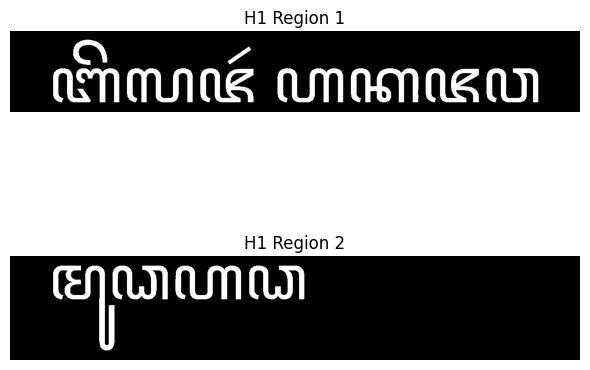

In [15]:
# Display the number of segmented regions
h1_regions = len(h1_segmentation)
print(f"Jumlah horizontal region yang terpotong: {h1_regions}")

# Example: Display the segmented regions
fig, axs = plt.subplots(h1_regions, 1, figsize=(6, 6))

if h1_regions == 1:
    # When there is only one region, axs will not be an array, so we need to convert it to a single-item array
    axs = np.array([axs])

for i in range(h1_regions):
    axs[i].imshow(h1_segmentation[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"H1 Region {i+1}")

plt.tight_layout()
plt.show()


### Vertical Segmentation

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def vertical_pp(image):
    # Step b: Buat histogram vertical
    v_projection = np.sum(image, axis=0)

    # plt.figure(figsize=(8, 8))
    # # Plotting the histogram
    # x_plot = np.arange(len(v_projection))
    # plt.plot(x_plot, v_projection)

    # # Adding labels and title
    # plt.xlabel('X Pixel')
    # plt.ylabel('Vertical Sum')
    # plt.title('Histogram')

    # # Display the plot
    # plt.show()

    # Step c: Buat array start_putih dan end_putih
    start_putih = []
    end_putih = []

    for x in range(len(v_projection)):
        if v_projection[x] > 0:
            if len(start_putih) == len(end_putih):
                start_putih.append(x)
        else:
            if len(start_putih) == (len(end_putih)+1):
                end_putih.append(x)
    if(len(start_putih) == len(end_putih)+1):
        end_putih.append(len(v_projection))
    
    v_segmentation = []
    for x in range(len(start_putih)):
        t = image[:, start_putih[x]:end_putih[x]]
        v_segmentation.append(t)

    return v_segmentation

### Vertical Segmentation 1 (Memisahkan Satu Set Aksara Per Baris )

In [17]:
# Display the number of segmented regions
h1_regions = len(h1_segmentation)

v1_segmentation = []

for i in range(h1_regions):
    # Perform projection profile and obtain segmented regions
    v_segmentation = vertical_pp(h1_segmentation[i])

    # Remove empty segments at the beginning and end (if any)
    v_segmentation = [region for region in v_segmentation if np.sum(region) > 0]

    # Check if the last character is properly segmented
    if np.sum(v_segmentation[-1]) == 0:
        # If the last segment is empty, remove it
        v_segmentation = v_segmentation[:-1]

    v1_segmentation.append(v_segmentation)


Jumlah Vertical region yang terpotong: 2
Jumlah horizontal region pada vertical region 0 : 7
Jumlah horizontal region pada vertical region 1 : 3


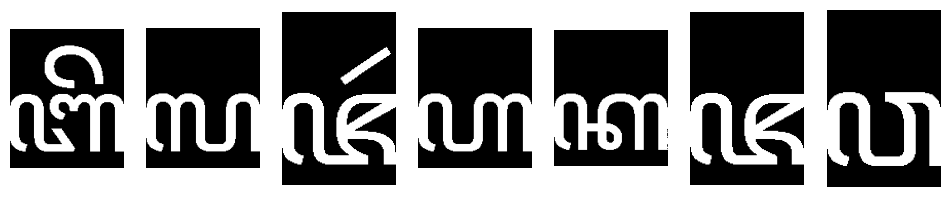

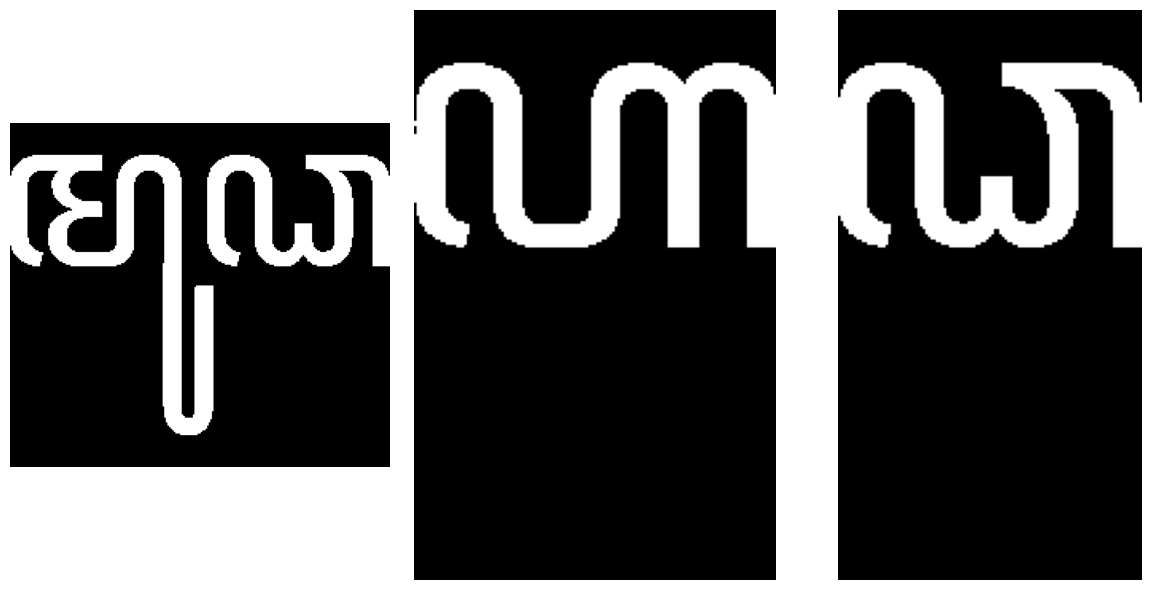

In [18]:
# Display the number of segmented regions
v1_regions = len(v1_segmentation)
print(f"Jumlah Vertical region yang terpotong: {v1_regions}")

for i in range(v1_regions):
    num_images = len(v1_segmentation[i])
    print(f"Jumlah horizontal region pada vertical region {i} : {num_images}")

    # Example: Display the segmented regions
    fig, axs = plt.subplots(1, num_images, figsize=(12, 6))

    if num_images == 1:
        # When there is only one image, axs will not be an array, so we need to convert it to a single-item array
        axs = np.array([axs])

    for j in range(num_images):
        axs[j].imshow(v1_segmentation[i][j], cmap='gray')
        axs[j].axis('off')

plt.tight_layout()
plt.show()


Jumlah Vertical region yang terpotong: 2
Jumlah horizontal region pada vertical region 0 : 7
Jumlah horizontal region pada vertical region 1 : 3


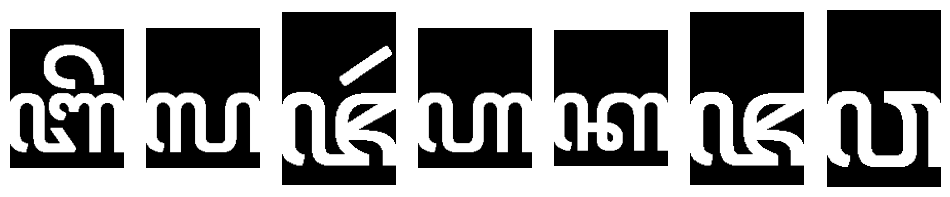

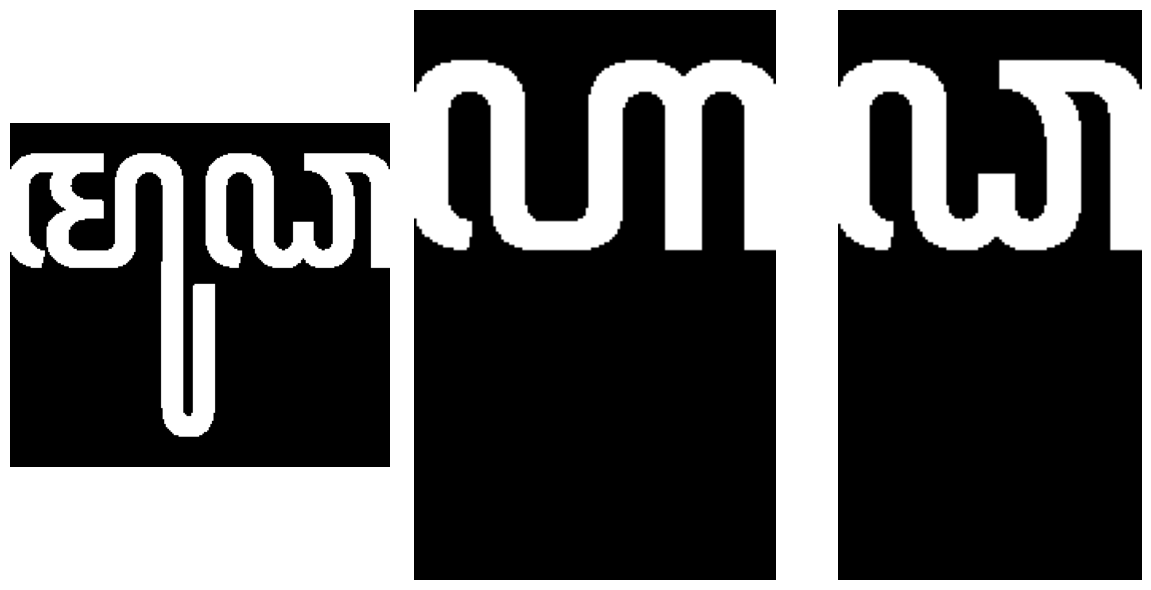

In [19]:
v1_segmentation_dilated = v1_segmentation

# Display the number of segmented regions
v1_regions = len(v1_segmentation_dilated)
print(f"Jumlah Vertical region yang terpotong: {v1_regions}")

for i in range(v1_regions):
    num_images = len(v1_segmentation_dilated[i])
    print(f"Jumlah horizontal region pada vertical region {i} : {num_images}")

    # Example: Display the segmented regions
    fig, axs = plt.subplots(1, num_images, figsize=(12, 6))

    if num_images == 1:
        # When there is only one image, axs will not be an array, so we need to convert it to a single-item array
        axs = np.array([axs])

    for j in range(num_images):
        v1_segmentation_dilated[i][j] = dilate_image(v1_segmentation_dilated[i][j], 3)
        axs[j].imshow(v1_segmentation_dilated[i][j], cmap='gray')
        axs[j].axis('off')

plt.tight_layout()
plt.show()

### Horizontal Segmentation 2 (Memisahkan Tiap Aksara Yang Berbeda)

In [20]:
# Display the number of segmented regions
v1_regions = len(v1_segmentation_dilated)
# print(f"Jumlah Vertical region yang terpotong: {v1_regions}")

h2_segmentation = []
tebal_px = 15
h2_treshold = int(255 * tebal_px)
for i in range(v1_regions):
    num_images = len(v1_segmentation_dilated[i])
    # print(f"Jumlah horizontal region pada vertical region {i} : {num_images}")

    h2_temp = []

    for j in range(num_images):
         # Perform projection profile and obtain segmented regions
        h_segmentation = horizontal_pp(v1_segmentation_dilated[i][j], v1_segmentation_dilated[i][j], h2_treshold)

        # Remove empty segments at the beginning and end (if any)
        h_segmentation = [region for region in h_segmentation if np.sum(region) > 0]

        # Check if the last character is properly segmented
        if np.sum(h_segmentation[-1]) == 0:
            # If the last segment is empty, remove it
            h_segmentation = h_segmentation[:-1]

        h2_temp.append(h_segmentation)
    h2_segmentation.append(h2_temp)



Jumlah vertical region pada horizontal region 1 : 7

Total Jumlah horizontal region pada vertical region 7 : 9

Jumlah vertical region pada horizontal region 2 : 3

Total Jumlah horizontal region pada vertical region 3 : 4


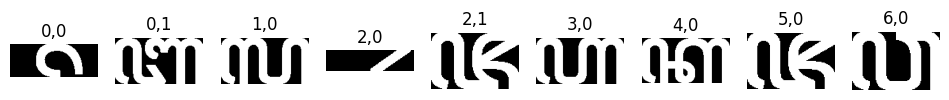

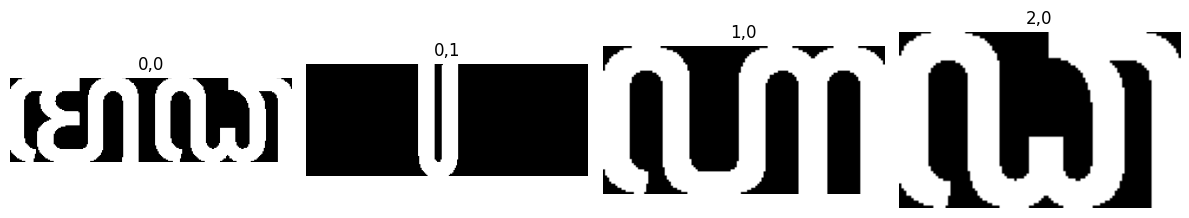

In [21]:
# Display the number of segmented regions
h2_regions = len(h2_segmentation)
# print(f"Jumlah Vertical region yang terpotong: {h2_regions}")

for i in range(h2_regions):
    num_col = len(h2_segmentation[i])
    print('')
    print(f"Jumlah vertical region pada horizontal region {i+1} : {num_col}")
    print('')

    num_images = 0    
    for j in range(num_col):
        num_img = len(h2_segmentation[i][j])
        # print(f"Jumlah horizontal region pada vertical region {j+1} : {num_img}")

        num_images += num_img

    # Example: Display the segmented regions
    fig, axs = plt.subplots(1, num_images, figsize=(12, 6))

    if num_images == 1:
        # When there is only one image, axs will not be an array, so we need to convert it to a single-item array
        axs = np.array([axs])

    num_item = 0  
    print(f"Total Jumlah horizontal region pada vertical region {j+1} : {num_images}")
    for j in range(num_col):
        num_img = len(h2_segmentation[i][j])

        for k in range(num_img):
            axs[num_item].imshow(h2_segmentation[i][j][k], cmap='gray')
            axs[num_item].axis('off')
            axs[num_item].set_title(f"{j},{k}")
            num_item += 1

plt.tight_layout()
plt.show()


### Vertical Segmentation 2 (Memisahkan Tiap Aksara Yang Berbeda Dan Menghapus Offset)

In [22]:
# Display the number of segmented regions
h2_regions = len(h2_segmentation)
# print(f"Jumlah horizontal region yang terpotong: {h2_regions}")

v2_segmentation = []

for i in range(h2_regions):
    num_col = len(h2_segmentation[i])
    # Menyimpan per baris
    v2_temp = []
    
    # print(f"Num Col : {num_col}")
    for j in range(num_col):
        num_img = len(h2_segmentation[i][j])
        # Menyimpan per satu set aksara dalam satu baris yang sama

        if num_img == 1:
            v2_temp.append(h2_segmentation[i][j])
        
        else:
            v2_temp_2 = []
        
            for k in range(num_img):
                 # Perform projection profile and obtain segmented regions
                v_segmentation = vertical_pp(h2_segmentation[i][j][k])

                # Remove empty segments at the beginning and end (if any)
                v_segmentation = [region for region in v_segmentation if np.sum(region) > 0]

                # Check if the last character is properly segmented
                if np.sum(v_segmentation[-1]) == 0:
                    # If the last segment is empty, remove it
                    v_segmentation = v_segmentation[:-1]

                if len(v_segmentation) > 1:
                    # print(f"{i}, {j}, {k}")
                    v2_temp.append([v_segmentation[0]])
                    v2_temp_2.append(v_segmentation[1])
                else:
                    v2_temp_2.append(v_segmentation[0])
            
            if (len(v2_temp_2) != 0):
                v2_temp.append(v2_temp_2)
    v2_segmentation.append(v2_temp)


Jumlah vertical region pada horizontal region 1 : 7

Total Jumlah horizontal region pada vertical region 7 : 9

Jumlah vertical region pada horizontal region 2 : 4

Total Jumlah horizontal region pada vertical region 4 : 5


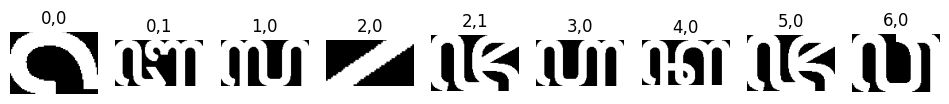

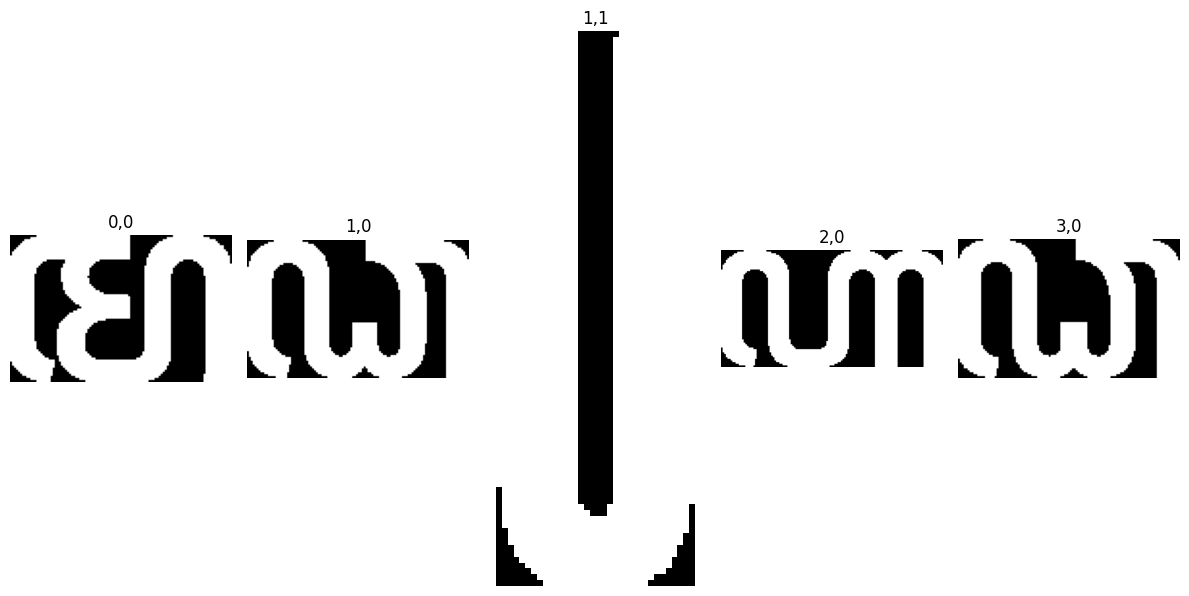

In [23]:
# Display the number of segmented regions
v2_regions = len(v2_segmentation)
# print(f"Jumlah Vertical region yang terpotong: {v2_regions}")

for i in range(v2_regions):
    num_col = len(v2_segmentation[i])
    print('')
    print(f"Jumlah vertical region pada horizontal region {i+1} : {num_col}")
    print('')

    num_images = 0    
    for j in range(num_col):
        num_img = len(v2_segmentation[i][j])
        # print(f"Jumlah horizontal region pada vertical region {j+1} : {num_img}")

        num_images += num_img

    # Example: Display the segmented regions
    fig, axs = plt.subplots(1, num_images, figsize=(12, 6))

    if num_images == 1:
        # When there is only one image, axs will not be an array, so we need to convert it to a single-item array
        axs = np.array([axs])

    num_item = 0  
    print(f"Total Jumlah horizontal region pada vertical region {j+1} : {num_images}")
    for j in range(num_col):
        num_img = len(v2_segmentation[i][j])

        for k in range(num_img):
            axs[num_item].imshow(v2_segmentation[i][j][k], cmap='gray')
            axs[num_item].axis('off')
            axs[num_item].set_title(f"{j},{k}")
            num_item += 1

plt.tight_layout()
plt.show()


### Set image in the center of canvas 128,128

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_to_canfas(image):
    # Read the image to be processed
    to_process = image

    # Calculate the new size with aspect ratio preserved
    max_size = 128 - 2 * 18
    height, width = to_process.shape[:2]

    if height > width:
        new_height = max_size
        ratio = new_height / height
        new_width = int(width * ratio)
        offset_x = 18
        offset_y = int((128 - new_height) / 2)
    else:
        new_width = max_size
        ratio = new_width / width
        new_height = int(height * ratio)
        offset_x = int((128 - new_width) / 2)
        offset_y = 18

    # Resize the image with the calculated size
    resized_image = cv2.resize(to_process, (new_width, new_height))

    # Create the canvas with padding
    canvas = np.zeros((128, 128), dtype=np.uint8)

    # calculate the x middle
    # 128 / 2 = 64
    x_start = 64-new_width//2
    y_start = 64-new_height//2
    canvas[y_start:y_start+new_height, x_start:x_start+new_width] = resized_image

    return canvas
# # Display the canvas with the image
# plt.imshow(canvas, cmap='gray')
# plt.show()


In [25]:
# Display the number of segmented regions
v2_regions = len(v2_segmentation)
# print(f"Jumlah Vertical region yang terpotong: {v2_regions}")

for i in range(v2_regions):
    num_col = len(v2_segmentation[i])

    for j in range(num_col):
        num_img = len(v2_segmentation[i][j])

        for k in range(num_img):
            v2_segmentation[i][j][k] = image_to_canfas(v2_segmentation[i][j][k])


Jumlah vertical region pada horizontal region 1 : 7

Total Jumlah horizontal region pada vertical region 7 : 9

Jumlah vertical region pada horizontal region 2 : 4

Total Jumlah horizontal region pada vertical region 4 : 5


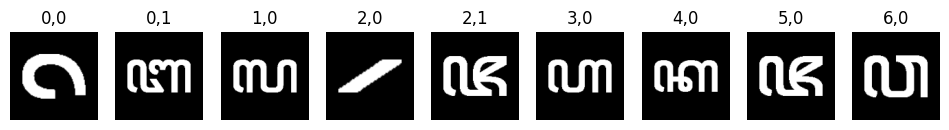

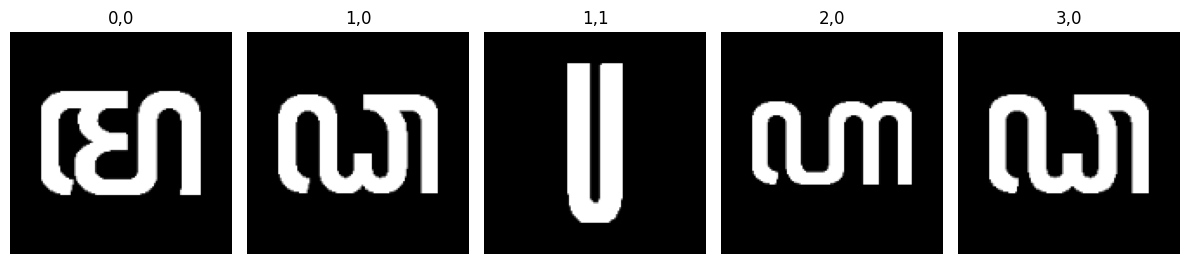

In [40]:
from PIL import Image

# Display the number of segmented regions
v2_regions = len(v2_segmentation)
# print(f"Jumlah Vertical region yang terpotong: {v2_regions}")

for i in range(v2_regions):
    num_col = len(v2_segmentation[i])
    print('')
    print(f"Jumlah vertical region pada horizontal region {i+1} : {num_col}")
    print('')

    num_images = 0    
    for j in range(num_col):
        num_img = len(v2_segmentation[i][j])
        # print(f"Jumlah horizontal region pada vertical region {j+1} : {num_img}")

        num_images += num_img

    # Example: Display the segmented regions
    fig, axs = plt.subplots(1, num_images, figsize=(12, 6))

    if num_images == 1:
        # When there is only one image, axs will not be an array, so we need to convert it to a single-item array
        axs = np.array([axs])

    num_item = 0  
    print(f"Total Jumlah horizontal region pada vertical region {j+1} : {num_images}")
    for j in range(num_col):
        num_img = len(v2_segmentation[i][j])

        for k in range(num_img):
            axs[num_item].imshow(v2_segmentation[i][j][k], cmap='gray')
            axs[num_item].axis('off')
            axs[num_item].set_title(f"{j},{k}")
            num_item += 1

            image = v2_segmentation[i][j][k]
            image_pil = Image.fromarray(image, mode='L')  # Create a PIL image object from the array
            image_path = f"output/dark_{i}_{j}_{k}.png"  # Output image path
            image_pil.save(image_path)  # Save the image to the specified path



plt.tight_layout()
plt.show()


### Resize Image and Bitwise Not

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Resize image
def resize_image(image, width, height):
    resized_image = cv2.resize(image, (width, height))
    return resized_image

In [38]:
# Apply image resizing and bitwise not operation to each image in v2_segmentation
processed_v2_segmentation = []

for i in range(len(v2_segmentation)):
    row = v2_segmentation[i]
    processed_row = []

    for j in range(len(row)):
        item = row[j]

        if isinstance(item, list):
            processed_item = [cv2.bitwise_not(resize_image(image, 128, 128)) for image in item]
        else:
            processed_item = cv2.bitwise_not(resize_image(item, 128, 128))

        processed_row.append(processed_item)

    processed_v2_segmentation.append(processed_row)


Jumlah vertical region pada horizontal region 1 : 7

Total Jumlah horizontal region pada vertical region 7 : 9

Jumlah vertical region pada horizontal region 2 : 4

Total Jumlah horizontal region pada vertical region 4 : 5


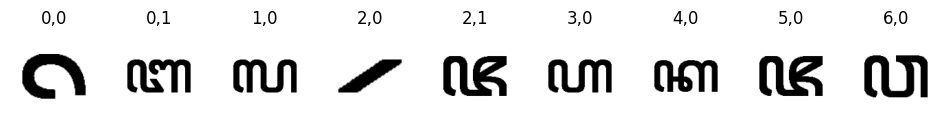

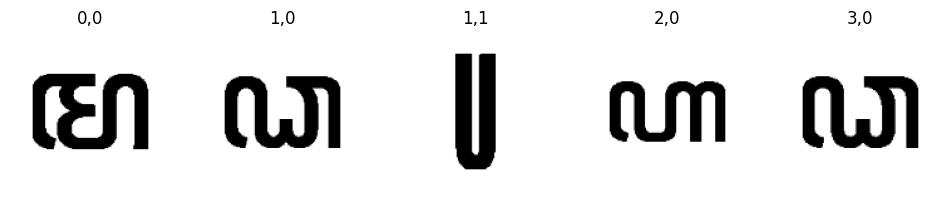

In [41]:
# Display the number of segmented regions
v2_regions = len(processed_v2_segmentation)
# print(f"Jumlah Vertical region yang terpotong: {v2_regions}")

for i in range(v2_regions):
    num_col = len(processed_v2_segmentation[i])
    print('')
    print(f"Jumlah vertical region pada horizontal region {i+1} : {num_col}")
    print('')

    num_images = 0    
    for j in range(num_col):
        num_img = len(processed_v2_segmentation[i][j])
        # print(f"Jumlah horizontal region pada vertical region {j+1} : {num_img}")

        num_images += num_img

    # Example: Display the segmented regions
    if num_images == 1:
        fig, axs = plt.subplots(1, 1, figsize=(6, 6))
        axs.imshow(processed_v2_segmentation[i][0][0], cmap='gray')
        axs.axis('off')
        axs.set_title(f"0,0")
    else:
        fig, axs = plt.subplots(1, num_images, figsize=(12, 6))

        num_item = 0  
        print(f"Total Jumlah horizontal region pada vertical region {j+1} : {num_images}")
        for j in range(num_col):
            num_img = len(processed_v2_segmentation[i][j])

            for k in range(num_img):
                axs[num_item].imshow(processed_v2_segmentation[i][j][k], cmap='gray')
                axs[num_item].axis('off')
                axs[num_item].set_title(f"{j},{k}")
                num_item += 1

                image = processed_v2_segmentation[i][j][k]
                image_pil = Image.fromarray(image, mode='L')  # Create a PIL image object from the array
                image_path = f"output/white_{i}_{j}_{k}.png"  # Output image path
                image_pil.save(image_path)  # Save the image to the specified path

plt.show()

### Classify Image Using Model

In [30]:
import os
from tensorflow import keras

# Define the root directory
ROOT_DIR = 'baksara_dataset'
model_load = 'model.h5'
model_path= os.path.join(ROOT_DIR, f"save_model/{model_load}")
final_model  = keras.models.load_model(model_path)

2023-06-15 07:01:05.582692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 07:01:06.015377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-06-15 07:01:06.015432: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-15 07:01:06.101692: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already be

In [31]:
# Preprocess Data for model prediction input
from PIL import Image
import numpy as np
from numpy import asarray

def PreprocessImageAsArray(image):
    im = image
    im = cv2.resize(im, (128, 128))  # Resize the image to match the model's input shape

    image_as_array = np.expand_dims(asarray(im), axis=0)
    scaled_image_as_array = np.true_divide(image_as_array, 255)
  
    return scaled_image_as_array


Jumlah vertical region pada horizontal region 1: 7

Total Jumlah horizontal region pada vertical region 7: 9
1/1 [==============================] - 0s 237ms/step

Jumlah vertical region pada horizontal region 2: 4

Total Jumlah horizontal region pada vertical region 4: 5
1/1 [==============================] - 0s 173ms/step


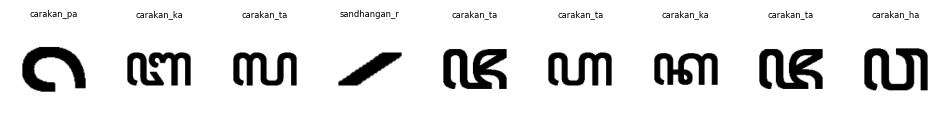

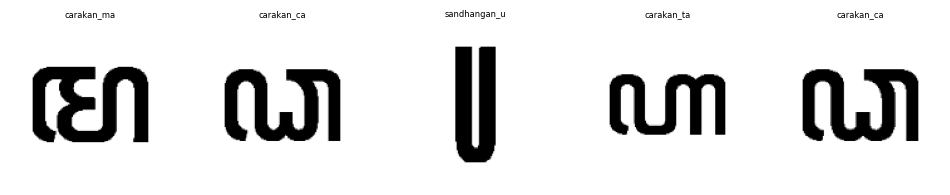

In [32]:
import cv2
import numpy as np

# Display the number of segmented regions
v2_regions = len(processed_v2_segmentation)

for i in range(v2_regions):
    num_col = len(processed_v2_segmentation[i])
    print(f"\nJumlah vertical region pada horizontal region {i+1}: {num_col}\n")

    num_images = 0    
    for j in range(num_col):
        num_img = len(processed_v2_segmentation[i][j])
        num_images += num_img

    # Example: Display the segmented regions
    if num_images == 1:
        fig, axs = plt.subplots(1, 1, figsize=(6, 6))
        input_image = processed_v2_segmentation[i][0][0]
        if len(input_image.shape) == 2:  # Grayscale image
            input_image = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
        input_image = PreprocessImageAsArray(input_image)  # Add batch dimension
        axs.imshow(input_image.squeeze(), cmap='gray')
        axs.axis('off')

        pred = final_model.predict(input_image)
        sorted_ranks = np.flip(np.argsort(pred[0]))
        axs.set_title(f"{class_names[sorted_ranks[0]]}", fontsize=6)  # Set smaller title size
    else:
        fig, axs = plt.subplots(1, num_images, figsize=(12, 6))

        num_item = 0  
        print(f"Total Jumlah horizontal region pada vertical region {j+1}: {num_images}")
        for j in range(num_col):
            num_img = len(processed_v2_segmentation[i][j])

            for k in range(num_img):
                input_image = processed_v2_segmentation[i][j][k]
                if len(input_image.shape) == 2:  # Grayscale image
                    input_image = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
                input_image = PreprocessImageAsArray(input_image)  # Add batch dimension

                axs[num_item].imshow(input_image.squeeze(), cmap='gray')
                axs[num_item].axis('off')

                pred = final_model.predict(input_image)
                sorted_ranks = np.flip(np.argsort(pred[0]))
                axs[num_item].set_title(f"{class_names[sorted_ranks[0]]}", fontsize=6)  # Set smaller title size

                num_item += 1



Jumlah vertical region pada horizontal region 1: 7

Total Jumlah horizontal region pada vertical region 7: 9
1/1 [==============================] - 0s 155ms/step

Jumlah vertical region pada horizontal region 2: 4

Total Jumlah horizontal region pada vertical region 4: 5
1/1 [==============================] - 0s 88ms/step


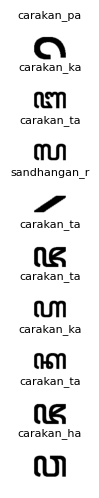

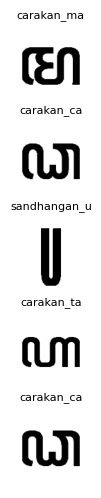

In [33]:
import cv2
import numpy as np

# Display the number of segmented regions
v2_regions = len(processed_v2_segmentation)

for i in range(v2_regions):
    num_col = len(processed_v2_segmentation[i])
    print(f"\nJumlah vertical region pada horizontal region {i+1}: {num_col}\n")

    num_images = 0    
    for j in range(num_col):
        num_img = len(processed_v2_segmentation[i][j])
        num_images += num_img

    # Example: Display the segmented regions
    if num_images == 1:
        fig, axs = plt.subplots(1, 1, figsize=(6, 6))
        input_image = processed_v2_segmentation[i][0][0]
        if len(input_image.shape) == 2:  # Grayscale image
            input_image = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
        input_image = PreprocessImageAsArray(input_image)  # Add batch dimension
        axs.imshow(input_image.squeeze(), cmap='gray')
        axs.axis('off')

        pred = final_model.predict(input_image)
        sorted_ranks = np.flip(np.argsort(pred[0]))
        axs.set_title(f"{class_names[sorted_ranks[0]]}", fontsize=6)  # Set smaller title size
    else:
        fig, axs = plt.subplots(num_images, 1, figsize=(6, 6))

        num_item = 0  
        print(f"Total Jumlah horizontal region pada vertical region {j+1}: {num_images}")
        for j in range(num_col):
            num_img = len(processed_v2_segmentation[i][j])

            for k in range(num_img):
                input_image = processed_v2_segmentation[i][j][k]
                if len(input_image.shape) == 2:  # Grayscale image
                    input_image = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
                input_image = PreprocessImageAsArray(input_image)  # Add batch dimension

                axs[num_item].imshow(input_image.squeeze(), cmap='gray')
                axs[num_item].axis('off')

                pred = final_model.predict(input_image)
                sorted_ranks = np.flip(np.argsort(pred[0]))
                axs[num_item].set_title(f"{class_names[sorted_ranks[0]]}", fontsize=8)  # Set smaller title size

                num_item += 1


### Transliteration Rule

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=393dbf1b-f9eb-4175-b2f2-a8ab52f3258c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>